Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
# Your name here
NAME = "John Ortiz"
# list collaborators separated by commas
COLLABORATORS = "N/a"

In [2]:
## Adding a check for version
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

## CSCI 3202 : Assignment 1 (50 points).

Answer the problems in this assignment in the space provided. There are two types of questions: 
  - Markdown answer questions: use markdown to type your answer and some latex if you include math symbols.
    - Please keep answers brief (we have provided a suggested length).
    - The course staff will be happy to give you some feedback on your answer style if you approach them early enough.
    - You can always post privately on piazza and ask us for feedback on the style (again: please give us sufficient time to do so).
  - Coding question: write the code and pass test cases. 
    - We may include hidden test cases and will examine your solution. Therefore, just passing test cases will not guarantee full points.
    
### Topics Covered
  - Agents, Environments and their Structure (AIMA Ch. 2)
  - Solving Problems by Searching (AIMA, Ch. 3.1 - 3.4)
    - Problem Structure
    - Read ahead to uninformed Search: BFS, DFS, UCS, and IDS.

# Problem 1: Grid World with Sentries

In this problem, we introduce a 4x4 grid world wherein the agent starts at the bottom left corner $(1,1)$ and seeks to 
reach the top right corner $(4,4)$ (see figure below). Unfortunately, there are obstacles and sentries. The agent cannot move into a square that is occupied with an obstacle. At the same time, each sentry does a fixed patrol: I.e, they move through a fixed list of grid coordinates over time and repeat ad-infinitum.

<div>
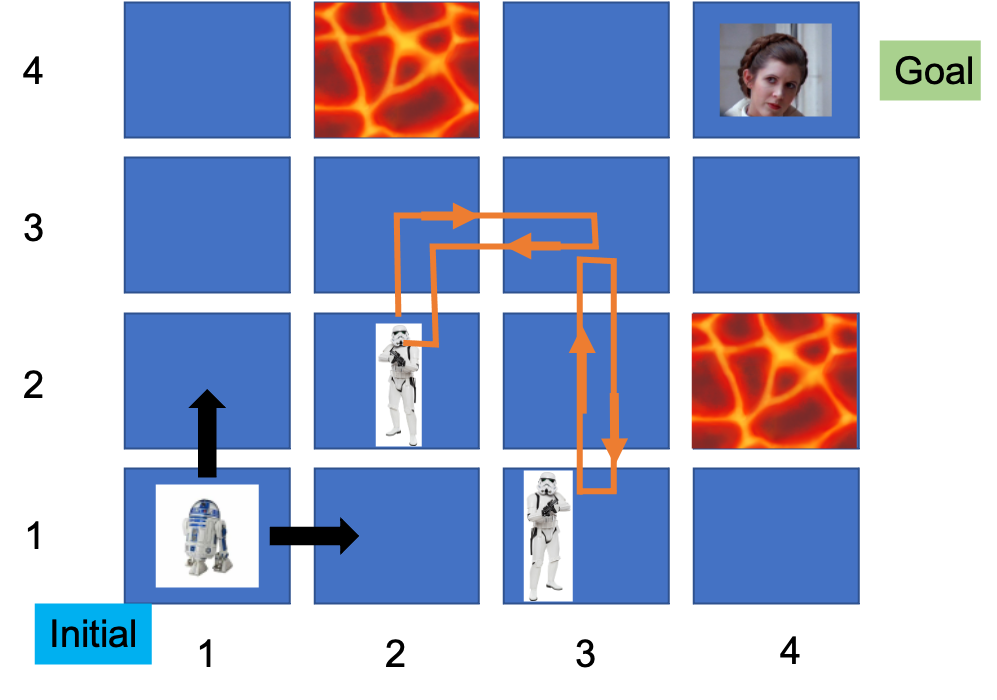
</div>
There are two sentries and each sentry has a fixed patrol pattern described by a list of positions.

  - Sentry # 1 Patrol: `[ (2,2), (2,3),  (3,3), (2,3) ]`
  - Sentry # 2 Patrol: `[(3,1), (3,2), (3,3), (3,2) ]`.
  
At the initial state, the sentries are each at the very first position in the lists. At each time step, the
sentries move one step to the next position in their lists. When the sentries exhaust their list, they "wrap around" and move to the very first positions, resuming their patrol again. 
  
There are two obstacle cells at $(4,2)$ and $(2,4)$.

  

If the agent is in the same square as a sentry, then they are arrested and it is "game over".

We will define a problem in terms of the following components:
  - States: What constitutes a state of the problem.
  - Actions: What are the actions available to the agent.
  - Transitions: For a given state, what are the actions available from that state as valid actions, and what is the next state that results from an action taken from a given state.
  - Goal Test: What are the goal state(s).
  - Path Cost: What is the path cost.
  
We refer you to section 3.1 of AIMA for a description and section 3.2 of AIMA for examples.

## Part A , 10 points


### Description of the Search Problem
Complete the description below of states, actions, transitions, goal and path costs for the 4x4 grid world with sentries problem described above. 

Your answers should follow a format similar to what we have provided below.


$\newcommand\sentryPosition{\mathsf{sentryPosition}}$
#### States 

The state consists of the position of the agent $(x,y)$ and the indices of the sentries in their list $(j_1, j_2)$. 
   - You may assume that $1 \leq x \leq 4, 1 \leq y \leq 4, 0 \leq j_1 \leq 3, 0 \leq j_2 \leq 3 $.

#### Actions 

 - *Actions*: For each state, the agent has 5 possible actions "up", "down", "left", "right" and "stay".
 
#### Transitions

For a state $((x,y), (j_1, j_2))$ specify the next state for various actions by filling out the missing portions.

For convenience use function $\sentryPosition(i, j)$ that retrieves the $j^{th}$ coordinate in the patrol list for sentry $i$.
   
**Action:** Up

  - Write down conditions on $x,y$, $\sentryPosition(1, j_1), \sentryPosition(2, j_2)$ that specify when the action "up" is _enabled_, i.e, _the action is available as a valid action from that state_.
  - **Answer:** $y \leq 3$ and $(x,y) \not= (2,3) $ and $(x,y) \not= (4,1)$ and $(x,y) \not= \sentryPosition(1, j_1)$ and $(x,y) \not= \sentryPosition(2, j_2)$.
  - What is the new state obtained after completing the  "up" action?
  - **Answer:** robot position is $(x, y+1)$ and sentry indices are $(j_1 + 1 \mod 4, j_2 + 1 \mod 4)$.
     

**Action:** Down

- Write down conditions on $x,y$, $\sentryPosition(1, j_1), \sentryPosition(2, j_2)$ that specify when the action "down" is enabled, i.e, the action is available as a valid action from that state

**Answer:** $ y > 1 \texttt{ and } (x,y) \neq (4,3)\texttt{ and }   (x,y) \neq \texttt{ sentryPosition}(1, j_1) \texttt{ and }   (x,y) \neq \texttt{ sentryPosition}(2, j_2) $

  - Write down the new state that is obtained after action "down" is completed.

**Answer:** robot position is $(x, y-1)$ and sentry indices are $(j_1 + 1 \mod 4, j_2 + 1 \mod 4)$

**Action:** Left 

- Write down conditions on $x,y$, $\sentryPosition(1, j_1), \sentryPosition(2,j_2)$ that specify when the action "left" is enabled,  i.e, the action is available as a valid action from that state

**Answer:** $ x > 1 \texttt{ and } (x,y) \neq (3,4)\texttt{ and }   (x,y) \neq \texttt{ sentryPosition}(1, j_1) \texttt{ and }   (x,y) \neq \texttt{ sentryPosition}(2, j_2) $

  - Write down the new state that is obtained after the action "left" is completed.

**Answer:** robot position is $(x-1, y)$ and sentry indices are $(j_1 + 1 \mod 4, j_2 + 1 \mod 4)$

**Action:** Right
   - Write down conditions on $x,y$, $\sentryPosition(1, j_1), \sentryPosition(2,j_2)$ that specify when the action "right" is enabled,  i.e, the action is available as a valid action from that state

**Answer:** $ x < 4 \texttt{ and } (x,y) \neq (3,2)\texttt{ and } (x,y) \neq (1,4) \texttt{ and }   (x,y) \neq \texttt{ sentryPosition}(1, j_1) \texttt{ and }   (x,y) \neq \texttt{ sentryPosition}(2, j_2) $

- Write down the new state that is obtained when action "right" is completed.

**Answer:** robot position is $(x+1, y)$ and sentry indices are $(j_1 + 1 \mod 4, j_2 + 1 \mod 4)$

**Action:** Stay
   - Write down conditions on $x,y$, $\sentryPosition(1, j_1), \sentryPosition(2,j_2)$ that specify when the action "stay" is enabled,  i.e, the action is available as a valid action from that state

$(x,y) \neq \texttt{ sentryPosition}(1, j_1) \texttt{ and }   (x,y) \neq \texttt{ sentryPosition}(2, j_2) $

  - Write down the new state that is obtained when action "stay" is completed.

**Answer:** robot position is $(x, y)$ and sentry indices are $(j_1 + 1 \mod 4, j_2 + 1 \mod 4)$

### Goal Test
For robot position $(x,y)$ and sentry positions $(j_1, j_2)$ write down the condition for it being a goal state.

$(x,y) = (4,4)$ and $ (x,y) \neq \texttt{ sentryPosition}(1, j_1) \texttt{ and }   (x,y) \neq \texttt{ sentryPosition}(2, j_2) $

## Part B (15 points)

Complete "Problem" class using the template given in the AIMA code repository for the NxN grid with obstacles and sentries.  Note that in this general version, you are given 
  - `n`: the number of grid cells.
  - The initial grid cell is (1,1) and the goal is (n,n)
  - There are `k` sentries specified by a list of their patrol pattern:
    - `[ lst1, ..., lstk] `, wherein each `lsti` is the list of coordinates that the sentry number `i` traverses.

Examine the problem class and complete the implementation of the NxN grid cell class below.

There are many tutorials on the web explaining classes and inheritance in python. Here is one:  https://www.geeksforgeeks.org/inheritance-in-python/

In [3]:
## Code copied from AIMA python repository to define a Problem class.
# DO NOT MODIFY, but please read through the specification of each method 
# in the class.

# Note that the problem class is a parent class specifying 
#  a problem data strucure. In the next cell you will be provided
#  a class that inherits from the `Problem` class that you will need
#  to implement.

# Read this code carefully since it describes the functions you will need to 
# implement in the subsequent cells.

class Problem:
    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal=None):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2. If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1

    def value(self, state):
        """For optimization problems, each state has a value. Hill Climbing
        and related algorithms try to maximize this value."""
        raise NotImplementedError

In [4]:
# Create a n x n grid problem instance by defining the missing classes.
# Define a state as a list of two tuples [(x,y), (j1, j2,..., jk)]
#   (x,y) : robot position assume 1 <= x <= n, 1 <= y <= n
#   (j1, j2, ..., jk): Indices that represent where each sentry is in their pattern of patroling the grid.

class NByNGridWithSentries(Problem):
    # Note: In python, we specify that this class 
    # inherits from the parent class
    # Problem using the syntax above.
    
    # FIELDS of this class included
    #   self.obstacle_locations --> list of (x,y) coordinates of the obstacles
    #   self.sentry_lists --> list of lists:
    #                each element is a list of coordinates for each sentry.
    #   self.num_sentry --> number of sentries. This is same as len(self.sentry_lists) for now
    #   self.grid_size: The size of the grid.

    # Constructor
    def __init__(self, n, obstacle_locations, sentry_lists):
        # Call the parent constructor initializing the robot to 
        #    Position (1,1)
        #    Sentries: index 0 in their patrol lists.
        #          Note that in python [0]*k produces a list of k zeros.
        #          Also note that you can convert a list into a tuple by using the inbuilt tuple function (converter)
        super().__init__( ((1,1), tuple([0]*len(sentry_lists))) )
        self.obstacle_locations = obstacle_locations
        self.sentry_lists = sentry_lists
        self.num_sentries = len(sentry_lists)
        self.grid_size = n

    # Function: get_sentry_position
    #  Get the (x,y) coordinate of sentry number sentry_id
    #        at position index pos_index in the sentry's patrol list.
    def get_sentry_position(self, sentry_id, pos_index):
        assert( 0 <= sentry_id < self.num_sentries)
        # YOUR CODE HERE
        oneList = self.sentry_lists[sentry_id]
        sentryCoord = oneList[pos_index]
        #print(sentryCoord)
        return sentryCoord
        #raise NotImplementedError()
        
    # Function: robot_has_been_caught_by_a_sentry
    #  Returns True if the robot position coincides with that of some sentry in the state
    #          False otherwise
    def robot_has_been_caught_by_a_sentry(self, state):
        (x,y) = state[0]
        sentry_indices = state[1]
        # get a list of  (xi,yi) coordinates for each sentrry
        #  using the function get_sentry_position
        # Check if the (x,y) coordinate of the robot is also an 
        #   element of the list of sentry coordinates.
        # YOUR CODE HERE
        for i in range(len(sentry_indices)):
            #print(i)
            sentryCoord = self.get_sentry_position(i,sentry_indices[i])
            if ((x,y) == sentryCoord):
                return True
            
        return False    
            
        #raise NotImplementedError()
    
    # Function: update_sentry_positions
    #  Increment the indices of each sentry so that they can "move"
    #   to the next coordinate in their patrol lists.
    #   
    def update_sentry_positions(self, sentry_positions):
        assert len(sentry_positions) == self.num_sentries
        sentry_list_lengths = [len(lst) for lst in self.sentry_lists]
        new_sentry_positions = [ (idx + 1) % lst_len 
                                for (idx, lst_len) in zip(sentry_positions, sentry_list_lengths) ]
        return tuple(new_sentry_positions)
                                
    
    # Function: actions
    # Return the list of actions that can be executed in the given state.
    # The universe of all actions include "stay", "up", "down", "left" and "right"
    # Ensure the following:
    #   1. If the robot is caught by the sentry, the state is a dead-end state
    #   2. Action cannot take the robot outside the [1,n] x [1,n] grid of points.
    #   3. After performing an action, the robot should not end up in a state with an obstacle in it.
    def actions(self, state):
        if self.robot_has_been_caught_by_a_sentry(state):
            # Complete the code for this situation
            # YOUR CODE HERE
            return []
            #raise NotImplementedError()
        else:
            lst_of_actions = []
            (x,y) = state[0]
            if (x,y) not in self.obstacle_locations:
                lst_of_actions.append('stay')
            if (x > 1 and (x -1, y) not in self.obstacle_locations):
                lst_of_actions.append('left')
            # TODO: Complete the code by writing the conditions that need to happen
            # Use strings 'right', 'down' and 'up' for the remaining actions.
            # YOUR CODE HERE
            if (x < self.grid_size and (x +1, y) not in self.obstacle_locations):
                lst_of_actions.append('right')
            if (y > 1 and (x, y-1) not in self.obstacle_locations):
                lst_of_actions.append('down')
            if (y < self.grid_size and (x, y+1) not in self.obstacle_locations):
                lst_of_actions.append('up')
            #raise NotImplementedError()
            return lst_of_actions
    
    # Function: result
    # Return the state that results from executing the given
    # action in the given state. You may assume that the 
    # action must be one of
    # self.actions(state).
    def result(self, state, action):
        (x,y) = state[0]
        sentry_positions = state[1]
        state_updates = {'stay': (0, 0), 
                        'left': (-1, 0),
                        'right': (1, 0),
                        'up': (0, 1),
                        'down': (0, -1)}
        assert (action in state_updates.keys())
        (delta_x, delta_y) = state_updates[action]
        (new_x, new_y) = (x + delta_x, y + delta_y)
        assert ((new_x, new_y) not in self.obstacle_locations)
        new_sentry_positions = self.update_sentry_positions(sentry_positions)
        return ((new_x, new_y), tuple(new_sentry_positions))
    
    # Function: goal_test
    #  Is the given state a goal: if so return True else return False
    def goal_test(self, state):
        (x,y) = state[0]
        # YOUR CODE HERE
        if(((x,y) == (self.grid_size,self.grid_size)) and (not self.robot_has_been_caught_by_a_sentry(state))):
            return True
        else:
            return False
        #raise NotImplementedError()

In [5]:
# BEGIN TEST CASES

# 4x4 grid with single obstacle at (1,3) and single sentry patrolling
#   the locations (2,2) -> (2,3) -> (3,2) -> cycle
p1 = NByNGridWithSentries(4, [(1,3)], [[(2,2),(2,3),(3,2)]])


print('Test 1: No next actions when robot caught by sentry.')
state1 = [(2,2), [0]]
assert(p1.robot_has_been_caught_by_a_sentry(state1))
assert(p1.actions(state1) == [])

print('Test 2: No next actions when robot caught by sentry.')
state2 = [(2,3),[1]]
assert(p1.robot_has_been_caught_by_a_sentry(state2))
assert(p1.actions(state2) == [])

print('Test 3: No next actions when robot caught by sentry.')
state3 = [(3,2),[2]]
assert(p1.robot_has_been_caught_by_a_sentry(state3))
assert(p1.actions(state3) == [])


print('Passed all test cases: 5 points')
# END TEST CASES

Test 1: No next actions when robot caught by sentry.
Test 2: No next actions when robot caught by sentry.
Test 3: No next actions when robot caught by sentry.
Passed all test cases: 5 points


In [6]:
# BEGIN TEST CASES

state4 = [(1,2), [0]]
print('Test 4a: Robot not caught by sentry in state5')
assert(not p1.robot_has_been_caught_by_a_sentry(state4))
print('Test 4b: Actions enabled when robot is at (1,2) and sentry is at index 0')
print('\t Debug: Actions enabled for state 4: ', p1.actions(state4))
assert('stay' in p1.actions(state4))
assert('right' in p1.actions(state4))
assert('down' in p1.actions(state4))
assert('left' not in p1.actions(state4))
assert('up' not in p1.actions(state4))
assert(not p1.goal_test(state4))


state5= [(2,3),[2]]
print('Test 5a: Robot not caught by sentry in state5')
assert(not p1.robot_has_been_caught_by_a_sentry(state5))
print('Test 5b: Actions enabled when robot is at (1,2) and sentry is at index 2')
print('\t Debug: Actions enabled for state 5: ', p1.actions(state5))
assert('stay' in p1.actions(state5))
assert('right' in p1.actions(state5))
assert('down' in p1.actions(state5))
assert('left' not in p1.actions(state5))
assert('up' in p1.actions(state5))
assert(not p1.goal_test(state5))

print('Passed all test cases: 5 points')
# BEGIN TEST CASES


Test 4a: Robot not caught by sentry in state5
Test 4b: Actions enabled when robot is at (1,2) and sentry is at index 0
	 Debug: Actions enabled for state 4:  ['stay', 'right', 'down']
Test 5a: Robot not caught by sentry in state5
Test 5b: Actions enabled when robot is at (1,2) and sentry is at index 2
	 Debug: Actions enabled for state 5:  ['stay', 'right', 'down', 'up']
Passed all test cases: 5 points


In [7]:
# BEGIN TEST CASES

state6 = [(4,4), [1]]
print('Test 6a: Robot not caught by sentry')
assert(not p1.robot_has_been_caught_by_a_sentry(state6))
print('Test 6b: Testing goal state')
assert(p1.goal_test(state6))

print('Test 7: Testing goal state')
state7 = [(4,4), [2]]
assert(p1.goal_test(state7))
print('Passed all test cases: 5 points')
# BEGIN TEST CASES


Test 6a: Robot not caught by sentry
Test 6b: Testing goal state
Test 7: Testing goal state
Passed all test cases: 5 points


## Problem 2 (25 points) : A simple reflex agent to avoid sentries.

In this problem, we will explore a "simple reflex" agent that will use a set of fixed rules to navigate the agent. The rules for the agent are as follows:
   - Get the list of available actions for the agent and the corresponding next state for each action.
   - Remove all actions whose next states lead to the agent being captured by the sentry.
     - You can use the function `self.robot_has_been_caught_by_a_sentry(state)` to check if a state is a fail state.
   - Among the remaining actions: 
      - If it is possible to go "up" then go "up"
      - Else, if it is possible to go "right" then go "right"
      - Else, if it is possible to go "left" then go "left"
      - Else, if it is possible to go "down" then go "down"
      - Else, just execute the action "stay".
      
## Part (A, 20 points) 
 Implement the agent according to the specification above by extending the `NByNGridWithSentries` class as shown below. 
 
 To build this agent, you will need to use the functions implemented in the `NByNGridWithSentries` class. Since we are inheriting from that class, we can call the functions directly. 

In [8]:
class NByNAgent(NByNGridWithSentries):
    def __init__(self, n, obstacle_locations, sentry_lists):
        super().__init__(n, obstacle_locations, sentry_lists)
    
    def react_to(self, state):
        """
        Implement the rule based agent here. 
        The function returns a tuple of two things:
          - action taken from the state
          - next state reached.
        """
        actions = self.actions(state) # get all actions from this state
        actions_next_state = [(act, self.result(state, act)) for act in actions]
        # 1. filter to remove all actions from actions_next_state that result in 
        #     a next state where robot is caught by a sentry.
        #     The function self.robot_has_been_caught_by_a_sentry(state) can be quite useful.
        improvedActions =[]
        state_list=[]
        for i in range(len(actions)):
            #traversing the actions returned
            #print(actions[i])
            #print(actions_next_state[i][1])
            if(self.robot_has_been_caught_by_a_sentry(actions_next_state[i][1]) == False):
                improvedActions.append(actions_next_state[i][0])
                state_list.append(actions_next_state[i][1])
        # 2. if action 'up' is in the list after filtering return ('up', next_state_for_up)
        #    elseif action 'right' is in the list then return ('right', next_state_for_right)
        #    elseif action "left" then return  ("left", next_state_for_left)
        #    elseif action "down" then return  ("down", next_state_for_down)
        #    else return ("stay", next_state_for_stay)
        if 'up' in improvedActions:
            index = improvedActions.index("up")
            return (improvedActions[index],state_list[index])
        elif 'right' in improvedActions:
            index = improvedActions.index("right")
            return (improvedActions[index],state_list[index])
        elif 'left' in improvedActions:
            index = improvedActions.index("left")
            return (improvedActions[index],state_list[index])
        elif 'down' in improvedActions:
            index = improvedActions.index("down")
            return (improvedActions[index],state_list[index])
        else:
            index = improvedActions.index("stay")
            return (improvedActions[index],state_list[index])

        
        #raise NotImplementedError()
        

In [9]:
### BEGIN TESTS

# define an agent in a 4x4 grid, 
# obstacles at (2,4) and (4,2)
# a single sentry that repeatedly patrols 
#   the cells (2,2),(2,3),(3,2), (2,2),(2,3),...
agent = NByNAgent(4, [(2,4), (4,2)], [[(2,2),(2,3),(3,2)]])

state1 = [(3,2), [1]]
(act2, state2) = agent.react_to(state1)
assert(act2 == 'up')
assert(state2[0] == (3,3))

state3 = [(4,1), [1]]
(act4, state4) = agent.react_to(state3)
assert(act4 == 'left')
assert(state4[0] == (3,1))


print('Passed all test cases: 7 points')
### END TESTS

Passed all test cases: 7 points


In [10]:
# BEGIN TEST CASES

agent = NByNAgent(4, [(2,4), (4,2)], [[(2,2),(2,3),(3,2)]])

state5 = [(3,1),[1]]
(act6, state6) = agent.react_to(state5)
assert(act6 == 'right')
assert(state6[0] == (4,1))


state7 = [(1,4), [0]]
(act8, state8) = agent.react_to(state7)
assert(act8 == 'down')
assert(state8[0] == (1,3))

# BEGIN TEST CASES

print('Passed all test cases: 8 points')

Passed all test cases: 8 points


## Part (B, 10 points) 

Predict what will result if the reflex agent from Part(A) is used to navigate the robot from the initial state for the 4x4 grid world defined for problem 1 (A). 

It will result with the robot becoming stuck in an infinite loop in top left corner of the grid. This is due to the design of the reflex agent as the priority of actions is as follows [ up, right, left, down, stay] Hence after exhausting our first action, we are limited to choose down and as it happen we can now go back. Thus creating the old and familiar infinite loop.

In [11]:
## CODE to test out the statement above (optional)
p1 = NByNAgent(4, [(2,4),(4,2)], [[ (2,2), (2,3), (3,3), (2,3)],
                                      [(3,1), (3,2), (3,3), (3,2)]])

cur_state = ((1,1), (0,0))
for i in range(10):
    act, next_state = p1. react_to(cur_state)
    print('Executing action: %s' % act)
    print('Next state:', next_state)
    if p1.robot_has_been_caught_by_a_sentry(next_state):
        print('Lost -- game over')
    elif p1.goal_test(next_state):
        print('Reachedd goal!!')
    else:
        cur_state = next_state
    

Executing action: up
Next state: ((1, 2), (1, 1))
Executing action: up
Next state: ((1, 3), (2, 2))
Executing action: up
Next state: ((1, 4), (3, 3))
Executing action: down
Next state: ((1, 3), (0, 0))
Executing action: up
Next state: ((1, 4), (1, 1))
Executing action: down
Next state: ((1, 3), (2, 2))
Executing action: up
Next state: ((1, 4), (3, 3))
Executing action: down
Next state: ((1, 3), (0, 0))
Executing action: up
Next state: ((1, 4), (1, 1))
Executing action: down
Next state: ((1, 3), (2, 2))


## Running Search on the Problem 1 
### Extra Stuff -- Not Graded

You can checkout how we run search on the problem. This code below is taken from the AIMA code repository as demonstrated in class. This is not an assignment, you can check out what kind of solution is output by various search algorithms.

In [12]:
# Search tree node class.
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        if parent:
            self.depth = parent.depth + 1
        else: 
            self.depth = 0
            
    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __lt__(self, node):
        return self.state < node.state
    
    def expand(self, problem):
        """List the nodes reachable in one step from this node."""
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next_state = problem.result(self.state, action)
        next_node = Node(next_state, self, action,
                    problem.path_cost(self.path_cost, self.state,
                                      action, next_state))
        return next_node
    
    def solution(self):
        """Return the sequence of actions to go from the root to this node."""
        return [node.action for node in self.path()[1:]]

    def path(self):
        """Return a list of nodes forming the path from the root to this node."""
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

    # We want for a queue of nodes in breadth_first_graph_search or
    # astar_search to have no duplicated states, so we treat nodes
    # with the same state as equal. [Problem: this may not be what you
    # want in other contexts.]

    def __eq__(self, other):
        return isinstance(other, Node) and self.state == other.state

    def __hash__(self):
        return hash(self.state)

In [13]:
# Code for various search algorithms
from collections import deque
import sys 
def breadth_first_tree_search(problem):
    """
    [Figure 3.7]
    Search the shallowest nodes in the search tree first.
    Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Repeats infinitely in case of loops.
    """

    frontier = deque([Node(problem.initial)])  # FIFO queue

    while frontier:
        node = frontier.popleft()
        if problem.goal_test(node.state):
            return node
        frontier.extend(node.expand(problem))
    return None


def depth_first_tree_search(problem):
    """
    [Figure 3.7]
    Search the deepest nodes in the search tree first.
    Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Repeats infinitely in case of loops.
    """

    frontier = [Node(problem.initial)]  # Stack

    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node
        frontier.extend(node.expand(problem))
    return None


def depth_first_graph_search(problem):
    """
    [Figure 3.7]
    Search the deepest nodes in the search tree first.
    Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Does not get trapped by loops.
    If two paths reach a state, only use the first one.
    """
    frontier = [(Node(problem.initial))]  # Stack

    explored = set()
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and child not in frontier)
    return None


def breadth_first_graph_search(problem):
    """[Figure 3.11]
    Note that this function can be implemented in a
    single line as below:
    return graph_search(problem, FIFOQueue())
    """
    node = Node(problem.initial)
    if problem.goal_test(node.state):
        return node
    frontier = deque([node])
    explored = set()
    while frontier:
        node = frontier.popleft()
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                if problem.goal_test(child.state):
                    return child
                frontier.append(child)
    return None



def depth_limited_search(problem, limit=50):
    """[Figure 3.17]"""

    def recursive_dls(node, problem, limit):
        if problem.goal_test(node.state):
            return node
        elif limit == 0:
            return 'cutoff'
        else:
            cutoff_occurred = False
            for child in node.expand(problem):
                result = recursive_dls(child, problem, limit - 1)
                if result == 'cutoff':
                    cutoff_occurred = True
                elif result is not None:
                    return result
            return 'cutoff' if cutoff_occurred else None

    # Body of depth_limited_search:
    return recursive_dls(Node(problem.initial), problem, limit)


def iterative_deepening_search(problem):
    """[Figure 3.18]"""
    for depth in range(sys.maxsize):
        result = depth_limited_search(problem, depth)
        if result != 'cutoff':
            return result




In [14]:
# define the problem from the example at the beginning of the assignment
problem = NByNGridWithSentries(4, [(2,4),(4,2)], 
                                     [[ (2,2), (2,3), (3,3), (2,3)],
                                      [(3,1), (3,2), (3,3), (3,2)]])

In [15]:
#run BFS
result = breadth_first_graph_search(problem)
print(result)

<Node ((4, 4), (3, 3))>


In [16]:
# Here is the solution for BFS
print(result.solution())

['stay', 'right', 'right', 'up', 'up', 'right', 'up']


In [17]:
# run DFS

result = depth_first_graph_search(problem)
print(result)

<Node ((4, 4), (3, 3))>


In [18]:
# Here is the solution for DFS
print(result.solution())

['up', 'up', 'up', 'down', 'stay', 'right', 'down', 'up', 'right', 'up', 'right']


In [19]:
# Run Iterative Deepening Search
result = iterative_deepening_search(problem)
print(result)

<Node ((4, 4), (3, 3))>


In [20]:
# Check out the IDS solution
print(result.solution())

['stay', 'right', 'right', 'up', 'up', 'right', 'up']


You could animate these solutions separately and check them out but in the meantime, notice how DFS solution is so wildly long whereas BFS should give you a solution to reach the goal within 7 steps.